In [1]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [2]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Regional_Water_Company\For_WR_Report\subsidence_clustering")

# Verify the change
print(os.getcwd())

H:\Regional_Water_Company\For_WR_Report\subsidence_clustering


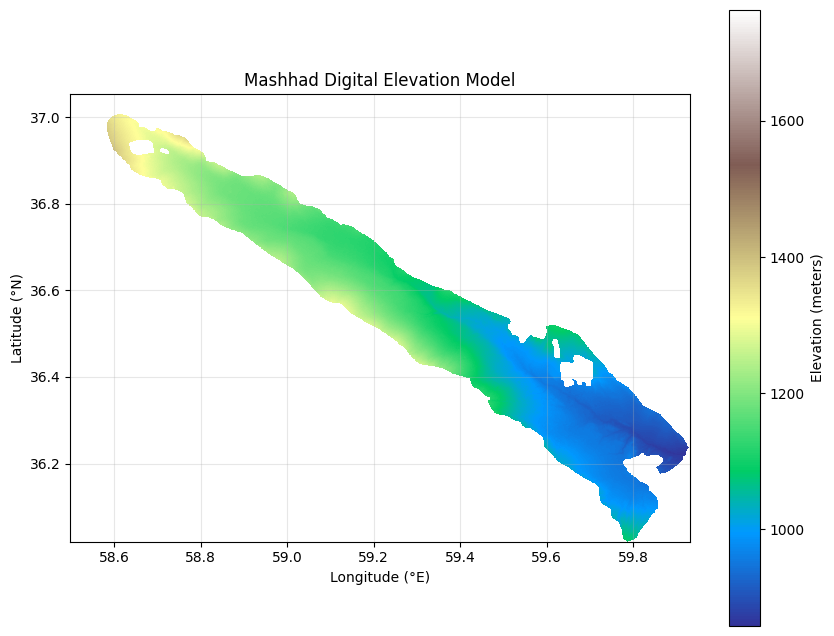

In [5]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# File path
file_path = "Mashhad_DEM.tif"  # Update with the correct path if needed

try:
    # Load the TIFF file
    with rasterio.open(file_path) as dem:
        # Read elevation data (single band)
        elevation = dem.read(1)
        # Get bounds from metadata
        bounds = dem.bounds
        extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]  # [58.49875, 59.93125, 36.01958, 37.05292]
        nodata = dem.nodatavals[0]  # NoData value: 32767.0

    # Mask NoData values
    elevation = np.ma.masked_equal(elevation, nodata)

    # Create the map
    plt.figure(figsize=(10, 8))
    im = plt.imshow(elevation, cmap='terrain', extent=extent, vmin=858, vmax=1763)
    plt.colorbar(im, label='Elevation (meters)')
    plt.title('Mashhad Digital Elevation Model')
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Latitude (°N)')
    plt.grid(True, alpha=0.3)
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file path.")
except Exception as e:
    print(f"Error: An issue occurred while processing the file: {str(e)}")

=== TIFF File Metadata ===
File Path: Mashhad_DEM.tif
Width: 1719 pixels
Height: 1240 pixels
Band Count: 1
Coordinate Reference System (CRS): EPSG:4326
Bounds: BoundingBox(left=58.49874999983337, bottom=36.01958333295411, right=59.93124999978381, top=37.05291666625169)
Affine Transform: | 0.00, 0.00, 58.50|
| 0.00,-0.00, 37.05|
| 0.00, 0.00, 1.00|
NoData Value: 32767.0
Pixel Size (Resolution): 0.0008333333333045011 x 0.0008333333333044978

=== Statistical Data ===
Mean Elevation: 1093.79
Median Elevation: 1095.00
Min Elevation: 858
Max Elevation: 1763
Standard Deviation: 119.03
Valid Pixel Count: 369675
NoData Pixel Count: 1761885


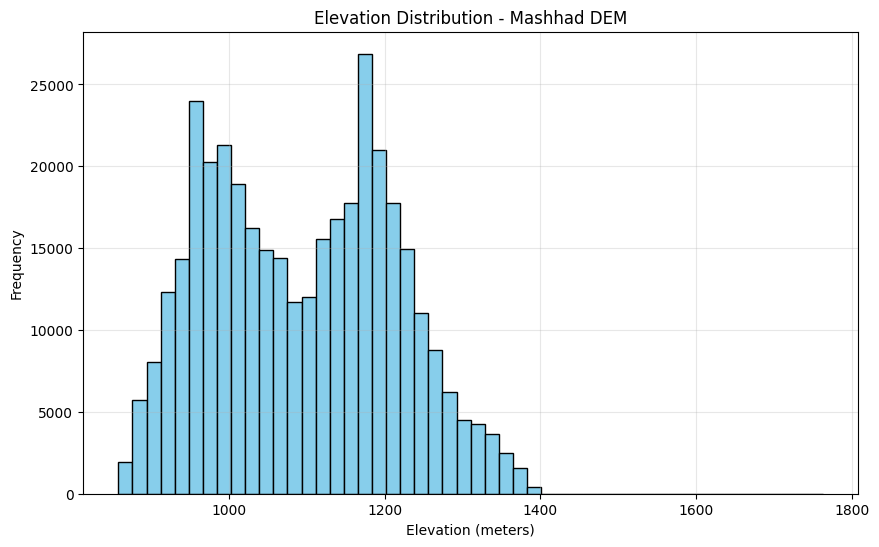

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the TIFF file
file_path = "Mashhad_DEM.tif"  # Update with the correct path if needed

try:
    with rasterio.open(file_path) as dem:
        # Extract metadata
        profile = dem.profile
        width, height = dem.width, dem.height
        bounds = dem.bounds
        crs = dem.crs
        transform = dem.transform
        nodata = dem.nodatavals[0] if dem.nodatavals else None
        band_count = dem.count

        # Read elevation data (assuming single band)
        elevation = dem.read(1)  # Read the first band

    # Mask NoData values
    elevation = np.ma.masked_equal(elevation, nodata) if nodata is not None else np.ma.masked_invalid(elevation)

    # Compute statistical data
    stats = {
        'Mean Elevation': np.ma.mean(elevation),
        'Median Elevation': np.ma.median(elevation),
        'Min Elevation': np.ma.min(elevation),
        'Max Elevation': np.ma.max(elevation),
        'Standard Deviation': np.ma.std(elevation),
        'Valid Pixel Count': np.ma.count(elevation),
        'NoData Pixel Count': np.prod(elevation.shape) - np.ma.count(elevation)
    }

    # Print metadata
    print("=== TIFF File Metadata ===")
    print(f"File Path: {file_path}")
    print(f"Width: {width} pixels")
    print(f"Height: {height} pixels")
    print(f"Band Count: {band_count}")
    print(f"Coordinate Reference System (CRS): {crs}")
    print(f"Bounds: {bounds}")
    print(f"Affine Transform: {transform}")
    print(f"NoData Value: {nodata}")
    print(f"Pixel Size (Resolution): {transform[0]} x {-transform[4]}")

    # Print statistical data
    print("\n=== Statistical Data ===")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}" if isinstance(value, (int, float)) else f"{key}: {value}")

    # Plot histogram of elevation values
    plt.figure(figsize=(10, 6))
    plt.hist(elevation.compressed(), bins=50, edgecolor='black', color='skyblue')
    plt.title('Elevation Distribution - Mashhad DEM')
    plt.xlabel('Elevation (meters)')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file path.")
except Exception as e:
    print(f"Error: An issue occurred while processing the file: {str(e)}")


Data Type: float32
Sample Values (first 10): [999. 999. 999. 999. 999. 999. 999. 999. 999. 999.]
Unique Values (sample): [-1166.7069 -1164.0985 -1161.2268 -1160.5605 -1156.3767 -1150.8652
 -1149.1471 -1148.3782 -1145.5481 -1144.7845 -1142.0616 -1140.8132
 -1140.6864 -1140.3042 -1137.1316 -1134.8086 -1134.5787 -1132.7955
 -1132.3483 -1132.2905]
=== TIFF File Metadata ===
File Path: Sub_Cum.tif
Width: 1317 pixels
Height: 1034 pixels
Band Count: 1
Coordinate Reference System (CRS): EPSG:4326
Bounds: BoundingBox(left=58.616, bottom=36.01981191588785, right=59.93146144859812, top=37.05260397196261)
Affine Transform: | 0.00, 0.00, 58.62|
| 0.00,-0.00, 37.05|
| 0.00, 0.00, 1.00|
NoData Value: 999.0
Pixel Size (Resolution): 0.0009988317757009273 x 0.0009988317757009299

=== Statistical Data ===
Mean Subsidence: -150.22109985351562
Median Subsidence: -47.839534759521484
Min Subsidence: -1166.7069091796875
Max Subsidence: 188.60586547851562
Standard Deviation: 232.74574279785156
Valid Pixel Coun

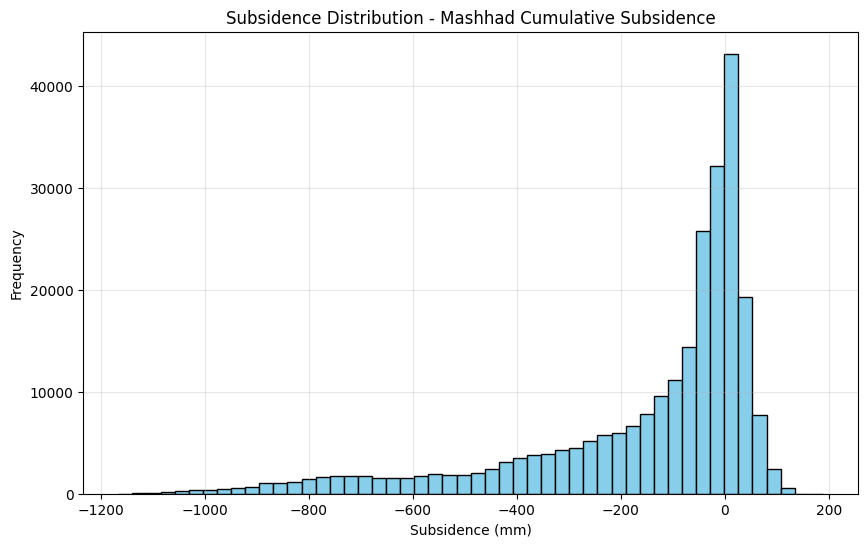

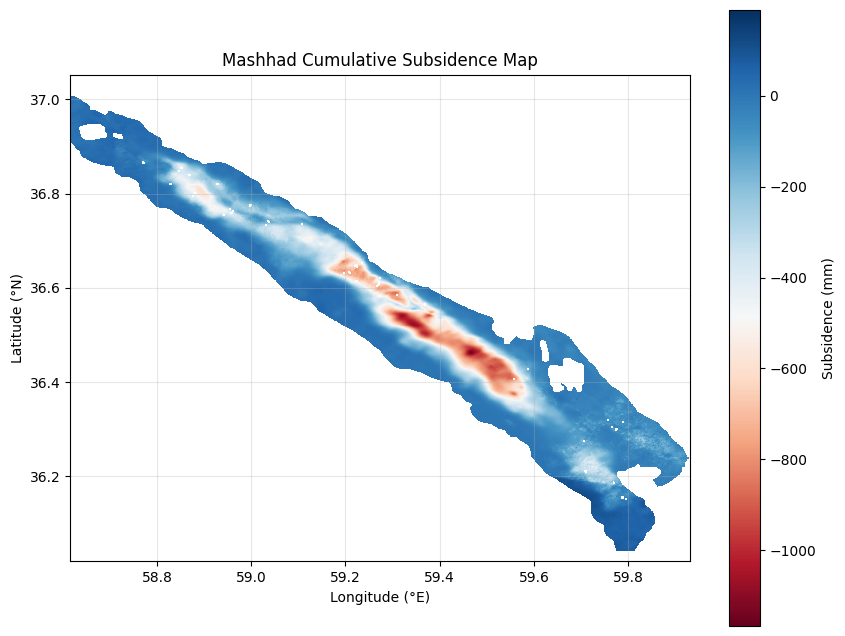

In [10]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the TIFF file
file_path = "Sub_Cum.tif"  # Update with the correct path if needed

try:
    with rasterio.open(file_path) as dem:
        # Extract metadata
        profile = dem.profile
        width, height = dem.width, dem.height
        bounds = dem.bounds
        crs = dem.crs
        transform = dem.transform
        nodata = dem.nodatavals[0] if dem.nodatavals else None
        band_count = dem.count

        # Read subsidence data (single band)
        subsidence = dem.read(1)

    # Print data type and sample values for diagnostics
    print(f"Data Type: {subsidence.dtype}")
    print(f"Sample Values (first 10): {subsidence.flat[:10]}")
    print(f"Unique Values (sample): {np.unique(subsidence)[:20]}")  # First 20 unique values

    # Mask NoData values (999.0) and handle NaN/infinite values
    subsidence = np.ma.masked_equal(subsidence, nodata) if nodata is not None else np.ma.masked_invalid(subsidence)
    subsidence = np.ma.masked_invalid(subsidence)  # Also mask NaN/infinite values

    # Compute statistical data on valid values
    valid_data = subsidence.compressed()  # Get only unmasked values
    if valid_data.size > 0:
        stats = {
            'Mean Subsidence': np.mean(valid_data),
            'Median Subsidence': np.median(valid_data),
            'Min Subsidence': np.min(valid_data),
            'Max Subsidence': np.max(valid_data),
            'Standard Deviation': np.std(valid_data),
            'Valid Pixel Count': valid_data.size,
            'NoData Pixel Count': np.prod(subsidence.shape) - valid_data.size
        }
    else:
        stats = {
            'Mean Subsidence': np.nan,
            'Median Subsidence': np.nan,
            'Min Subsidence': np.nan,
            'Max Subsidence': np.nan,
            'Standard Deviation': np.nan,
            'Valid Pixel Count': 0,
            'NoData Pixel Count': np.prod(subsidence.shape)
        }
        print("Warning: No valid data after masking. Check NoData value or data content.")

    # Print metadata
    print("=== TIFF File Metadata ===")
    print(f"File Path: {file_path}")
    print(f"Width: {width} pixels")
    print(f"Height: {height} pixels")
    print(f"Band Count: {band_count}")
    print(f"Coordinate Reference System (CRS): {crs}")
    print(f"Bounds: {bounds}")
    print(f"Affine Transform: {transform}")
    print(f"NoData Value: {nodata}")
    print(f"Pixel Size (Resolution): {transform[0]} x {-transform[4]}")

    # Print statistical data
    print("\n=== Statistical Data ===")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}" if isinstance(value, (int, float)) and not np.isnan(value) else f"{key}: {value}")

    # Plot histogram of valid subsidence values
    if valid_data.size > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(valid_data, bins=50, edgecolor='black', color='skyblue')
        plt.title('Subsidence Distribution - Mashhad Cumulative Subsidence')
        plt.xlabel('Subsidence (mm)')  # Adjust unit if needed
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("Cannot plot histogram: No valid data available.")

    # Plot 2D map of subsidence
    plt.figure(figsize=(10, 8))
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]  # [58.616, 59.93146, 36.01981, 37.05260]
    im = plt.imshow(subsidence, cmap='RdBu', extent=extent, vmin=np.min(valid_data) if valid_data.size > 0 else None, 
                    vmax=np.max(valid_data) if valid_data.size > 0 else None)
    plt.colorbar(im, label='Subsidence (mm)')  # Adjust unit if needed
    plt.title('Mashhad Cumulative Subsidence Map')
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Latitude (°N)')
    plt.grid(True, alpha=0.3)
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file path.")
except Exception as e:
    print(f"Error: An issue occurred while processing the file: {str(e)}")

Data Type: float32
Sample Values (first 10): [-999. -999. -999. -999. -999. -999. -999. -999. -999. -999.]
Unique Values (sample): [-9.9900000e+02  0.0000000e+00  1.0949780e-01  1.5485308e-01
  2.1899480e-01  2.4484333e-01  3.0970392e-01  3.2849020e-01
  3.4625864e-01  3.9479417e-01  4.3798319e-01  4.5146218e-01
  4.6455020e-01  4.8967773e-01  5.4747301e-01  5.5831444e-01
  5.8964360e-01  6.1938971e-01  6.3845074e-01  6.5695882e-01]
=== TIFF File Metadata ===
File Path: Slope.tif
Width: 1631 pixels
Height: 1176 pixels
Band Count: 1
Coordinate Reference System (CRS): EPSG:4326
Bounds: BoundingBox(left=58.49829349821937, bottom=36.019703338040124, right=59.9313084997732, top=37.05295020611327)
Affine Transform: | 0.00, 0.00, 58.50|
| 0.00,-0.00, 37.05|
| 0.00, 0.00, 1.00|
NoData Value: -999.0
Pixel Size (Resolution): 0.0008786112823751279 x 0.0008786112823751271

=== Statistical Data ===
Mean Slope: 0.8903947472572327
Median Slope: 0.7742201685905457
Min Slope: 0.0
Max Slope: 19.40478134

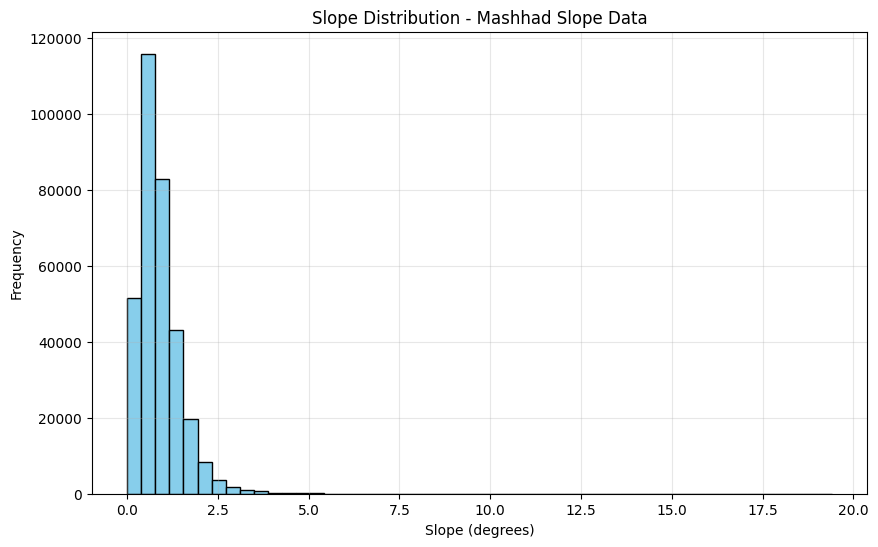

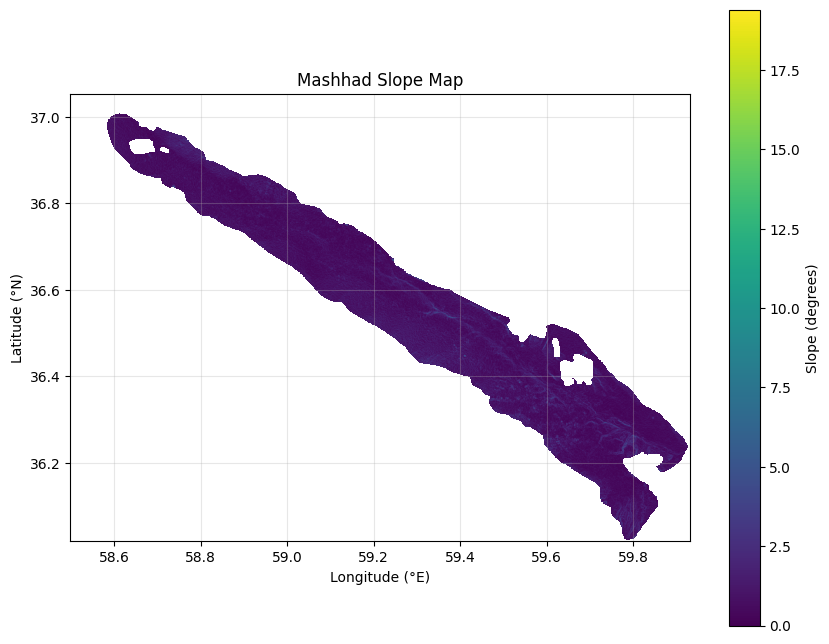

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the TIFF file
file_path = "Slope.tif"  # Update with the correct path if needed

try:
    with rasterio.open(file_path) as dem:
        # Extract metadata
        profile = dem.profile
        width, height = dem.width, dem.height
        bounds = dem.bounds
        crs = dem.crs
        transform = dem.transform
        nodata = dem.nodatavals[0] if dem.nodatavals else None
        band_count = dem.count

        # Read slope data (single band)
        slope = dem.read(1)

    # Print data type and sample values for diagnostics
    print(f"Data Type: {slope.dtype}")
    print(f"Sample Values (first 10): {slope.flat[:10]}")
    print(f"Unique Values (sample): {np.unique(slope)[:20]}")  # First 20 unique values

    # Mask NoData values (999.0) and handle NaN/infinite values
    slope = np.ma.masked_equal(slope, nodata) if nodata is not None else np.ma.masked_invalid(slope)
    slope = np.ma.masked_invalid(slope)  # Also mask NaN/infinite values

    # Compute statistical data on valid values
    valid_data = slope.compressed()  # Get only unmasked values
    if valid_data.size > 0:
        stats = {
            'Mean Slope': np.mean(valid_data),
            'Median Slope': np.median(valid_data),
            'Min Slope': np.min(valid_data),
            'Max Slope': np.max(valid_data),
            'Standard Deviation': np.std(valid_data),
            'Valid Pixel Count': valid_data.size,
            'NoData Pixel Count': np.prod(slope.shape) - valid_data.size
        }
    else:
        stats = {
            'Mean Slope': np.nan,
            'Median Slope': np.nan,
            'Min Slope': np.nan,
            'Max Slope': np.nan,
            'Standard Deviation': np.nan,
            'Valid Pixel Count': 0,
            'NoData Pixel Count': np.prod(slope.shape)
        }
        print("Warning: No valid data after masking. Check NoData value or data content.")

    # Print metadata
    print("=== TIFF File Metadata ===")
    print(f"File Path: {file_path}")
    print(f"Width: {width} pixels")
    print(f"Height: {height} pixels")
    print(f"Band Count: {band_count}")
    print(f"Coordinate Reference System (CRS): {crs}")
    print(f"Bounds: {bounds}")
    print(f"Affine Transform: {transform}")
    print(f"NoData Value: {nodata}")
    print(f"Pixel Size (Resolution): {transform[0]} x {-transform[4]}")

    # Print statistical data
    print("\n=== Statistical Data ===")
    for key, value in stats.items():
        print(f"{key}: {value:.2f}" if isinstance(value, (int, float)) and not np.isnan(value) else f"{key}: {value}")

    # Plot histogram of valid slope values
    if valid_data.size > 0:
        plt.figure(figsize=(10, 6))
        plt.hist(valid_data, bins=50, edgecolor='black', color='skyblue')
        plt.title('Slope Distribution - Mashhad Slope Data')
        plt.xlabel('Slope (degrees)')  # Adjust unit if needed (e.g., percent)
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("Cannot plot histogram: No valid data available.")

    # Plot 2D map of slope
    plt.figure(figsize=(10, 8))
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]  # [58.616, 59.93146, 36.01981, 37.05260]
    im = plt.imshow(slope, cmap='viridis', extent=extent, vmin=np.min(valid_data) if valid_data.size > 0 else None, 
                    vmax=np.max(valid_data) if valid_data.size > 0 else None)
    plt.colorbar(im, label='Slope (degrees)')  # Adjust unit if needed
    plt.title('Mashhad Slope Map')
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Latitude (°N)')
    plt.grid(True, alpha=0.3)
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file path.")
except Exception as e:
    print(f"Error: An issue occurred while processing the file: {str(e)}")

=== Statistical Data (Negative Subsidence Pixels) ===
Valid Pixel Count (Negative Subsidence): 180180
Mean Subsidence: -220.75 mm
Mean Elevation: 1062.43 m
Mean Slope: -0.81 degrees

=== Correlation Matrix ===
                 Subsidence (mm)  Elevation (m)  Slope (degrees)
Subsidence (mm)         1.000000      -0.052392        -0.052473
Elevation (m)          -0.052392       1.000000        -0.489416
Slope (degrees)        -0.052473      -0.489416         1.000000


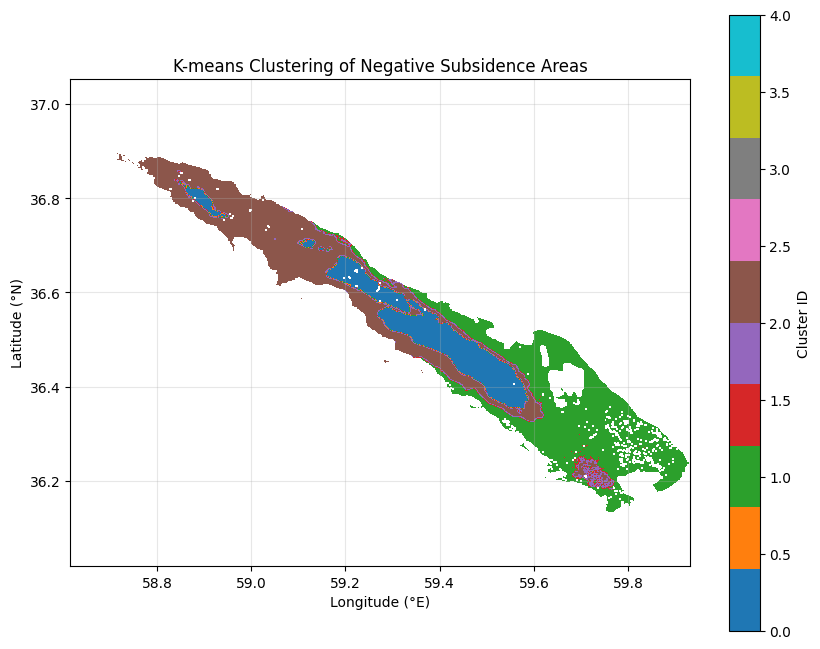

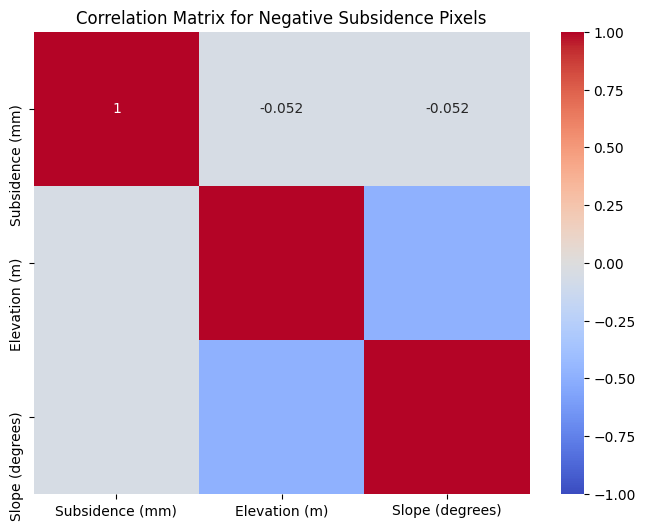

In [13]:
import rasterio
import numpy as np
from rasterio.warp import reproject, Resampling
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# File paths
sub_file = "Sub_Cum.tif"
dem_file = "Mashhad_DEM.tif"
slope_file = "Slope.tif"

try:
    # Load subsidence data
    with rasterio.open(sub_file) as sub_src:
        sub_data = sub_src.read(1)
        sub_profile = sub_src.profile
        sub_bounds = sub_src.bounds
        sub_nodata = sub_src.nodatavals[0] if sub_src.nodatavals else None
        sub_transform = sub_src.transform

    # Load DEM data
    with rasterio.open(dem_file) as dem_src:
        dem_data = dem_src.read(1)
        dem_nodata = dem_src.nodatavals[0] if dem_src.nodatavals else None

    # Load slope data
    with rasterio.open(slope_file) as slope_src:
        slope_data = slope_src.read(1)
        slope_nodata = slope_src.nodatavals[0] if slope_src.nodatavals else None

    # Align DEM and slope to subsidence grid
    dem_aligned = np.empty_like(sub_data, dtype=np.float32)
    slope_aligned = np.empty_like(sub_data, dtype=np.float32)

    reproject(
        source=dem_data,
        destination=dem_aligned,
        src_transform=dem_src.transform,
        src_crs=dem_src.crs,
        dst_transform=sub_transform,
        dst_crs=sub_src.crs,
        resampling=Resampling.bilinear
    )

    reproject(
        source=slope_data,
        destination=slope_aligned,
        src_transform=slope_src.transform,
        src_crs=slope_src.crs,
        dst_transform=sub_transform,
        dst_crs=sub_src.crs,
        resampling=Resampling.bilinear
    )

    # Mask NoData values
    sub_data = np.ma.masked_equal(sub_data, sub_nodata) if sub_nodata is not None else np.ma.masked_invalid(sub_data)
    dem_data = np.ma.masked_equal(dem_aligned, dem_nodata) if dem_nodata is not None else np.ma.masked_invalid(dem_aligned)
    slope_data = np.ma.masked_equal(slope_aligned, slope_nodata) if slope_nodata is not None else np.ma.masked_invalid(slope_aligned)

    # Create a combined mask for valid data and negative subsidence
    valid_mask = (~sub_data.mask) & (~dem_data.mask) & (~slope_data.mask) & (sub_data < 0)
    if not np.any(valid_mask):
        raise ValueError("No valid pixels with negative subsidence found.")

    # Extract valid data for clustering and correlation
    sub_valid = sub_data[valid_mask].compressed()
    dem_valid = dem_data[valid_mask].compressed()
    slope_valid = slope_data[valid_mask].compressed()

    # Create DataFrame for clustering and correlation
    data = pd.DataFrame({
        'Subsidence (mm)': sub_valid,
        'Elevation (m)': dem_valid,
        'Slope (degrees)': slope_valid
    })

    # Perform K-means clustering
    n_clusters = 5  # Adjust as needed
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)

    # Create cluster map
    cluster_map = np.full_like(sub_data, np.nan, dtype=np.float32)
    cluster_map[valid_mask] = labels

    # Compute correlation matrix
    corr_matrix = data.corr()

    # Print statistics
    print("=== Statistical Data (Negative Subsidence Pixels) ===")
    print(f"Valid Pixel Count (Negative Subsidence): {len(sub_valid)}")
    print(f"Mean Subsidence: {np.mean(sub_valid):.2f} mm")
    print(f"Mean Elevation: {np.mean(dem_valid):.2f} m")
    print(f"Mean Slope: {np.mean(slope_valid):.2f} degrees")
    print("\n=== Correlation Matrix ===")
    print(corr_matrix)

    # Plot cluster map
    plt.figure(figsize=(10, 8))
    extent = [sub_bounds.left, sub_bounds.right, sub_bounds.bottom, sub_bounds.top]
    im = plt.imshow(cluster_map, cmap='tab10', extent=extent)
    plt.colorbar(im, label='Cluster ID')
    plt.title('K-means Clustering of Negative Subsidence Areas')
    plt.xlabel('Longitude (°E)')
    plt.ylabel('Latitude (°N)')
    plt.grid(True, alpha=0.3)
    plt.show()

    # Plot correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix for Negative Subsidence Pixels')
    plt.show()

except FileNotFoundError as e:
    print(f"Error: File not found - {str(e)}")
except Exception as e:
    print(f"Error: An issue occurred while processing the files: {str(e)}")